# Test Statistics and Hypothesis Testing

In [3]:
# Dependencies
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as sc
from scipy.stats import t

In [ ]:
# Overview

# t-tests are very important to understand
# Previously covered are notebooks about alpha and distribution
# I tend to call the t-distribution test statisic the t-value
# The t-value is also a metric that determines an x-axis measure
# I tend to think of the x-axis as a measure of standard deviation and the p-value is the area to the 'outside' of this measure


## Calculating t-value, p-value

<IPython.core.display.Javascript object>

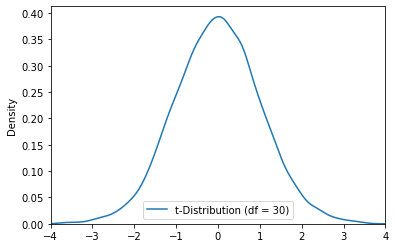

In [4]:
# t-distribution with 30 Degrees of Freedom
# With 30+ DOF, the distribution is very similar to a normal distribution

fig, ax = plt.subplots()
plt.xlim(-4,4)
x = t.rvs(df=30, size=10000)
sns.kdeplot(x, ax=ax, label=f"t-Distribution (df = 30)")
plt.legend()

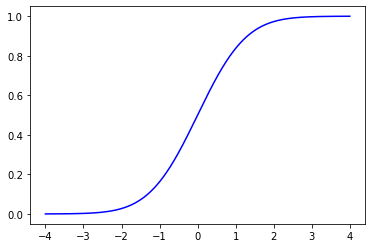

In [5]:
# t-distribution
# y axis indicates the the area under the t-distribution curve and can help determine the p-value
mean=0
std=1

x=np.linspace(mean-4*std, mean+4*std,1000)
plt.plot(x,t.cdf(x,df=30),'b')

Shows t-dist has heavy tails (aka greater kurtosis) thus causing a smaller peak



In [35]:
# calculate the p-value of test statistic

# test statistic
t_value = 2.0

# one-tailed p-value
p_value_one_tail = (1 - t.cdf(x=abs(t_value), df=30))
print(f"The one tailed p-value is {round(p_value_one_tail,3)}")

# # alternate way to calculate one tail p-value
# p_value = sc.t.sf(abs(t_value), df=30)
# print(f"The one tailed p-value is {round(p_value,3)}")

# two-tailed p-value
#calculate p-value
p_value_two_tail = (1 - t.cdf(x=abs(t_value), df=30)) * 2
print(f"The two tailed p-value is {round(p_value_two_tail,3)}")

# # alternate way to calculate two tail p-value
# p_value = sc.t.sf(abs(t_value), df=30)*2
# print(f"The two tailed p-value is {round(p_value,3)}")

The one tailed p-value is 0.027
The two tailed p-value is 0.055


## Using t-test with two data sets

In [30]:
# Random values from t-distribution
# Default ttest_ind is two tail (as set by `alternative` parameter)

rand_data_1 = np.random.standard_t(df=30, size=30)
rand_data_2 = np.random.standard_t(df=30, size=30)
statistic, pvalue = sc.ttest_ind(rand_data_1, rand_data_2)
print(f"The t-value is {statistic}")
print(f"The p-value is {pvalue}")

The t-value is -1.3771352530211665
The p-value is 0.17376239331825957


In [38]:
# Double check that we can calculate the p-value from the test statistic

# p_value_two_tail = sc.t.sf(abs(statistic), df=30)*2
p_value_two_tail = (1 - t.cdf(x=abs(statistic), df=30)) * 2
print(f"The two tail p-value is {p_value_two_tail:0.3f}")

The two tail p-value is 0.179


T-statistic is in units of standard error
So a t-statistic of zero means there is no evidence that the two samples are different so fail to reject null hypothesis
The p-value is the area under the curve from the T-static to the right for a one-tail (right) t-test or to the left for a one-tail (left) t-test or the tails for a two-tail t-test

## Test Statistic Concepts

As mentioned above, the test statistic is a measure that indicates the relationship between two groups with the density function x-axis.
So this basically means that the x-axis is set in multiples of the standard error

To reiterate, the t-distribution is a function of the number of degrees of freedom and is labeled as $T_{DOF}$


This is the equation for standard deviation (biased estimator):

$Standard Deviation = \sigma = \sqrt{\frac{\sum{(x_1 - \mu)}^2}{N}}$ 

$Standard Error = \frac{\sigma}{\sqrt{n}}$

## Types of t-tests

### Why use t-distribution?
* tends to be a good estimator even when population variance is not known
* fairly robust against errors even when the distribution is not very normally shaped or sufficiently large (30+ samples)
* more important is that the data is distributed symetrically
* also a two tail test is less affected by skewness than a one tail test

### Testing Assumptions
* Boxplot shows symmetry - median in middle of box and equal size whiskers
* Histogram looks symmetrical
* Mean is similar to the median
* Coefficient of skewness is small
* QQ Plot is linear
* Shapiro-Wilk - W-stat and p-value are greater than $\alpha$ theshold

### One Sample t-Test (population variation unknown)
* One group is being tested and inferring results to the greater population
* Example: Comparing weight loss of a group after a time lapse (one tail (left) t-Test or two tail t-test if the results could be an overall weight loss or gain)

### Two Sample t-Test (equal or unequal variation methods) 
* Comparing two independent groups of the same population
* Example: Cancer Treatment Group versus Placebo Group

### Paired Sample t-Test
* Sample from a population is selected and two measurements for each unique item (each item's pair is considered a sample)
* The paired measurements are not independent.
* Alternate names are matched samples or repeated measures
* Example:  Effect of Beer versus Wine on Memory of X number of people


### Two Sample versus Paired t-Tests
*  Here are two methods to do the same thing:  create a group of 20 people who will do one task (drink beer) and another group of 20 people who do another task (drink wine).  The two sample t-test would be used.  The other method is to have a group of 20 people and have them do two tasks (drink beer, drink wine).  The paired t-test would be used.
*  Paired test requires few participants but typically have more issues with implementation/interference effects (participant not giving true responses, order effects, etc)
* Paired test has greater control of confounding variables but participants could be biased since they might figure out the purpose of the tests.

## T-value Formulas

Equations below show the numerator as the difference between the means and the denominator as an estimate of the standard error (see above)

The T-value is an estimate of how many units of standard error are between the two sample means.  The t-distribution is used to determine if this test statistic is greater than (reject null hypothesis) or less than (fail to reject null hypothesis) the threshold (the standard error units associated with $\alpha$)


<hr>

### Unequal Variance t-test (aka Welch t-test)
* Another term for unequal variances is heteroscedasticity
* Used when variances are different or unknown (uses cautious test statistic)
<br>

$T-value = \frac{mean_1 - mean_2}{\sqrt{\Biggl( \frac{var_1}{n_1} + \frac{var_2}{n_2} \Biggr) }}$

The degree of freedoms is calculated as:

$ D of F = \frac{ \Biggl( \frac{var_1^2}{n_1} + \frac{var_2^2}{n_2} \Biggr)^2}{\frac{ \Biggl( \frac{var_1^2}{n_1} \Biggr)^2}{n_1-1} + \frac{ \Biggl(\frac{var_2^2}{n_2} \Biggr)^2}{n_2-1}}$  

Python method: `scipy.stats.ttest_ind(arr1, arr2, equal_var= False)`

<br>
<hr>

### Equal Variance or Pooled T-test
<br>

$T-value = \frac{mean_1 - mean_2}{ \frac{(n_1 - 1) x var_1^2+(n_2-1) x var_2^2}{n+1 + n_2 - 2} X \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} }$

$DofF = n_1 + n_2 - 2$  

Python method:  `scipy.stats.ttest_ind(arr1, arr2, , equal_var= False)`

<br>
<hr>

### Paired t-test
<br>

$ T-value = \frac{mean_1 - mean_2}{\frac{s(diff)}{\sqrt{(n)}}} $
    
The degreees of freedom are `n-1`

Python method:  `scipy.stats.ttest_rel(arr1, arr2)`

<br>
<hr>

### Confidence Intervals

$Confidence Interval = x \pm t_{1 - \alpha/2, n-1} \Biggl(\frac{s}{\sqrt{n}}\Biggr)$

### Other Considerations

1.  Use t-distribution when the population standard deviation is unknown
1.  Use t-distribution when the sample is less than 30 records
1.  Use z-distribution when the population standard deviation is known and the sample has 30+ records